<a href="https://colab.research.google.com/github/benasphy/Mean-shift/blob/main/Customer%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

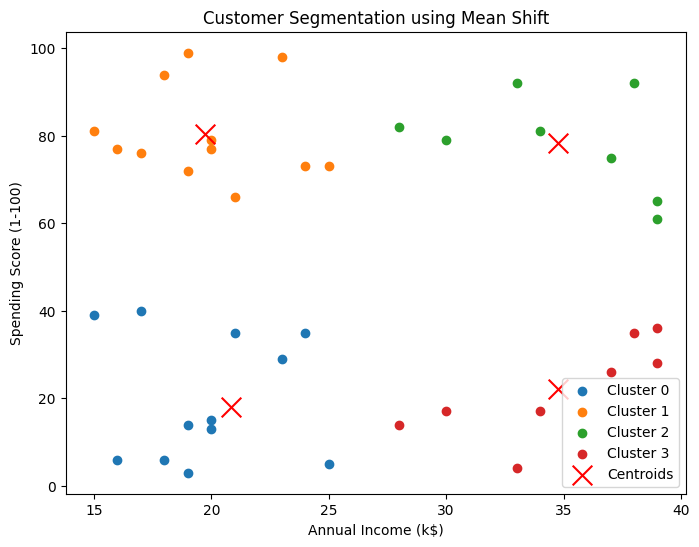

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler

# Simulated real-world dataset: Customer segmentation based on spending
# Columns: [Annual Income (k$), Spending Score (1-100)]
data = np.array([
    [15, 39], [15, 81], [16, 6], [16, 77], [17, 40], [17, 76], [18, 6], [18, 94],
    [19, 3], [19, 72], [19, 14], [19, 99], [20, 15], [20, 77], [20, 13], [20, 79],
    [21, 35], [21, 66], [23, 29], [23, 98], [24, 35], [24, 73], [25, 5], [25, 73],
    [28, 14], [28, 82], [30, 17], [30, 79], [33, 4], [33, 92], [34, 17], [34, 81],
    [37, 26], [37, 75], [38, 35], [38, 92], [39, 36], [39, 61], [39, 28], [39, 65]
])

# Convert to DataFrame for better visualization
df = pd.DataFrame(data, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Estimate bandwidth for Mean Shift
bandwidth = estimate_bandwidth(data_scaled, quantile=0.2)

# Apply Mean Shift clustering
ms = MeanShift(bandwidth=bandwidth)
ms.fit(data_scaled)
labels = ms.labels_
centers = ms.cluster_centers_

# Add cluster labels to DataFrame
df['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(labels):
    plt.scatter(data[labels == cluster, 0], data[labels == cluster, 1], label=f'Cluster {cluster}')

plt.scatter(centers[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            centers[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('Customer Segmentation using Mean Shift')
plt.show()
